In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [96]:
data = pd.read_csv("../data/clean_data.csv")

In [3]:
num_columns = [
    'phones_num',
    'phb_fraud',
    'phb_dirty',
    'phb_all_bad',
    'phb_all',
    'phb_bad_perc',
    'found_phones',
    'phb_fraud_dir',
    'phb_dirty_dir',
    'phb_all_bad_dir',
    'phb_all_dir',
    'phb_bad_perc_dir',
    'found_phones_dir',
    'claims_percent',
    'claims_num',
    'appl_num',
    'complaints_num',
    'complaints_num_dir',
    'mvd_request_num',
    'bad_rep_tcb',
    'total_case_cnt',
    'total_defendant_case_cnt',
    'total_defendant_case_amt',
    'defendant_case_perc',
    'rating_ya',
    'ratings_cnt_ya',
    'reviews_cnt_ya',
    'rating_yell',
    'reviews_cnt_yell',
    'rating_2gis',
    'reviews_cnt_2gis',
    'rating_avito',
    'reviews_cnt_avito'
]
cat_columns = [
    "id",
    "date"
]

In [97]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito'],
      dtype='object')

In [98]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
12059,a772323158190a,2022-09-04 00:00:00,2,0.0,0.0,0.0,4102.0,0.0,2.0,0.0,...,0.0,-1.0,NaN,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0
11849,a772400129380a,2022-08-28 00:00:00,1,0.0,0.0,0.0,981.0,0.0,1.0,0.0,...,0.0,-1.0,NaN,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0
6291,a6658429576a,2022-04-09 00:00:00,11,0.0,0.0,0.0,1721.0,0.0,9.0,0.0,...,0.0,4.5,13.0,6.0,4.50,0.0,5.0,2.0,-1.0,-1.0
9219,a5038121719a,2022-09-26 00:00:00,6,0.0,0.0,0.0,4524.0,0.0,5.0,0.0,...,0.0,5.0,104.0,69.0,4.35,3.0,0.0,0.0,-1.0,-1.0
4370,a7802164550a,2019-06-27 00:00:00,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,4.5,367.0,76.0,5.00,1.0,0.0,0.0,-1.0,-1.0


In [99]:
data.shape

(15000, 35)

In [100]:
# data = np.asarray(data[num_columns]).astype(np.float32)

In [10]:
# class AnomalyDetector(tf.keras.Model):
#     def __init__(self):
#         super(AnomalyDetector, self).__init__()
#         self.encoder = tf.keras.Sequential([
#             tf.keras.layers.Flatten(input_shape=(33, 1)),
#             tf.keras.layers.Dense(1024),
#             tf.keras.layers.Dense(128),
#             tf.keras.layers.Dense(2)])
#
#         self.decoder = tf.keras.Sequential([
#             tf.keras.layers.Dense(140),
#             tf.keras.layers.Dense(32),
#             tf.keras.layers.Dense(2)
#         ])
#
#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded
#
# autoencoder = AnomalyDetector()

In [11]:
# autoencoder.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
# )

In [7]:
data.shape

(15000, 35)

In [13]:
# train_data, test_data, train_labels, test_labels = train_test_split(
#     data, data, test_size=0.2, random_state=21
# )

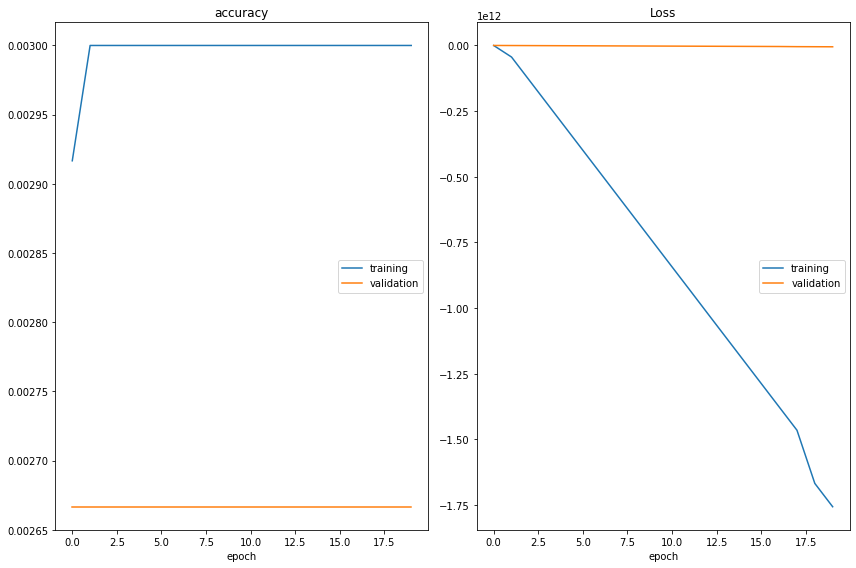

accuracy
	training         	 (min:    0.003, max:    0.003, cur:    0.003)
	validation       	 (min:    0.003, max:    0.003, cur:    0.003)
Loss
	training         	 (min: -1756270428160.000, max: -179303136.000, cur: -1756270428160.000)
	validation       	 (min: -5172246528.000, max: -122784376.000, cur: -5172246528.000)


In [14]:
# history = autoencoder.fit(
#     train_data, train_data,
#     epochs=20,
#     batch_size=512,
#     validation_data=(test_data, test_data),
#     shuffle=True,
#     callbacks=[PlotLossesKeras()], verbose=False
# )

In [15]:
# autoencoder.predict(data)[:10]

469/469 [==============================] - 1s 1ms/step


array([[1.        , 0.999554  , 0.9820893 , 0.9999999 , 1.        ,
        0.23201635, 1.        , 0.4170521 , 0.34505206, 0.5802654 ,
        1.        , 0.2809637 , 0.9736542 , 0.16473539, 0.24496472,
        0.9980556 , 0.21163927, 0.1494261 , 0.31032395, 0.13730401,
        0.3357665 , 0.27491933, 1.        , 0.34870303, 0.28851384,
        1.        , 1.        , 0.77176356, 0.9411032 , 0.10028004,
        1.        , 0.00992675, 0.11505125],
       [1.        , 0.999554  , 0.9820893 , 0.9999999 , 1.        ,
        0.23201635, 1.        , 0.4170521 , 0.34505206, 0.5802654 ,
        1.        , 0.2809637 , 0.9736542 , 0.16473539, 0.24496472,
        0.9980556 , 0.21163927, 0.1494261 , 0.31032395, 0.13730401,
        0.3357665 , 0.27491933, 1.        , 0.34870303, 0.28851384,
        1.        , 1.        , 0.77176356, 0.9411032 , 0.10028004,
        1.        , 0.00992675, 0.11505125],
       [1.        , 0.999554  , 0.9820893 , 0.9999999 , 1.        ,
        0.23201635, 1.    

In [101]:
data = pd.read_csv("../data/clean_data.csv")

In [102]:
data.isna().sum()

id                              0
date                            0
phones_num                      0
phb_fraud                       0
phb_dirty                       0
phb_all_bad                     0
phb_all                         0
phb_bad_perc                    0
found_phones                    0
phb_fraud_dir                   0
phb_dirty_dir                   0
phb_all_bad_dir                 0
phb_all_dir                     0
phb_bad_perc_dir                0
found_phones_dir                0
claims_percent                  0
claims_num                      0
appl_num                        0
complaints_num                  0
complaints_num_dir              0
mvd_request_num                 0
bad_rep_tcb                     0
total_case_cnt                  0
total_defendant_case_cnt        0
total_defendant_case_amt        0
defendant_case_perc             0
rating_ya                       0
ratings_cnt_ya              10523
reviews_cnt_ya                  0
rating_yell   

In [103]:
data.ratings_cnt_ya = data.ratings_cnt_ya.fillna(0)

In [104]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
2291,a9701033040a,2022-10-29 00:00:00,4,0.0,1.0,1.0,5477.0,0.02,4.0,0.0,...,0.0,-1.0,0.0,-1.0,4.50,0.0,3.0,2.0,-1.0,-1.0
266,a251113789466a,2021-12-24 00:00:00,5,0.0,1.0,1.0,776.0,0.13,4.0,0.0,...,0.0,4.0,53.0,20.0,4.50,0.0,0.0,0.0,-1.0,-1.0
2795,a7714467717a,2022-10-07 00:00:00,2,0.0,0.0,0.0,92.0,0.00,2.0,0.0,...,0.0,-1.0,0.0,-1.0,4.25,0.0,0.0,0.0,-1.0,-1.0
11813,a371123225697a,2022-10-08 00:00:00,1,0.0,0.0,0.0,949.0,0.00,1.0,0.0,...,0.0,-1.0,0.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0
12669,a505307803804a,2022-08-27 00:00:00,1,0.0,0.0,0.0,344.0,0.00,1.0,0.0,...,0.0,-1.0,0.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.0


In [19]:
mergings = linkage(data[num_columns].values, method='complete') #  очень долго

KeyboardInterrupt: 

In [ ]:
mergings[:10]

In [105]:
Q1 = data.phb_all.quantile(0.0)
Q3 = data.phb_all.quantile(0.97)
IQR = Q3 - Q1

In [106]:
data = data.loc[(data.phb_all > Q1) & (data.phb_all < Q3)]

In [382]:
q = data.phb_all.quantile([0.25, 0.50, 0.75, 0.9, 1])

def get_size(phb_cnt):
    for i, v in enumerate(q.values):
        if phb_cnt <= v:
            return i

data_q = data.copy()
data_q['popularity'] = data_q['phb_all'].apply(lambda value: get_size(value))

In [660]:
model = TSNE(
    n_components=3, learning_rate='auto',
    init='random', perplexity=150
) # perplexity можно поставить больше, нооооооо...

In [661]:
transformed = model.fit_transform(data[num_columns])

In [662]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
z_axis = transformed[:, 2]

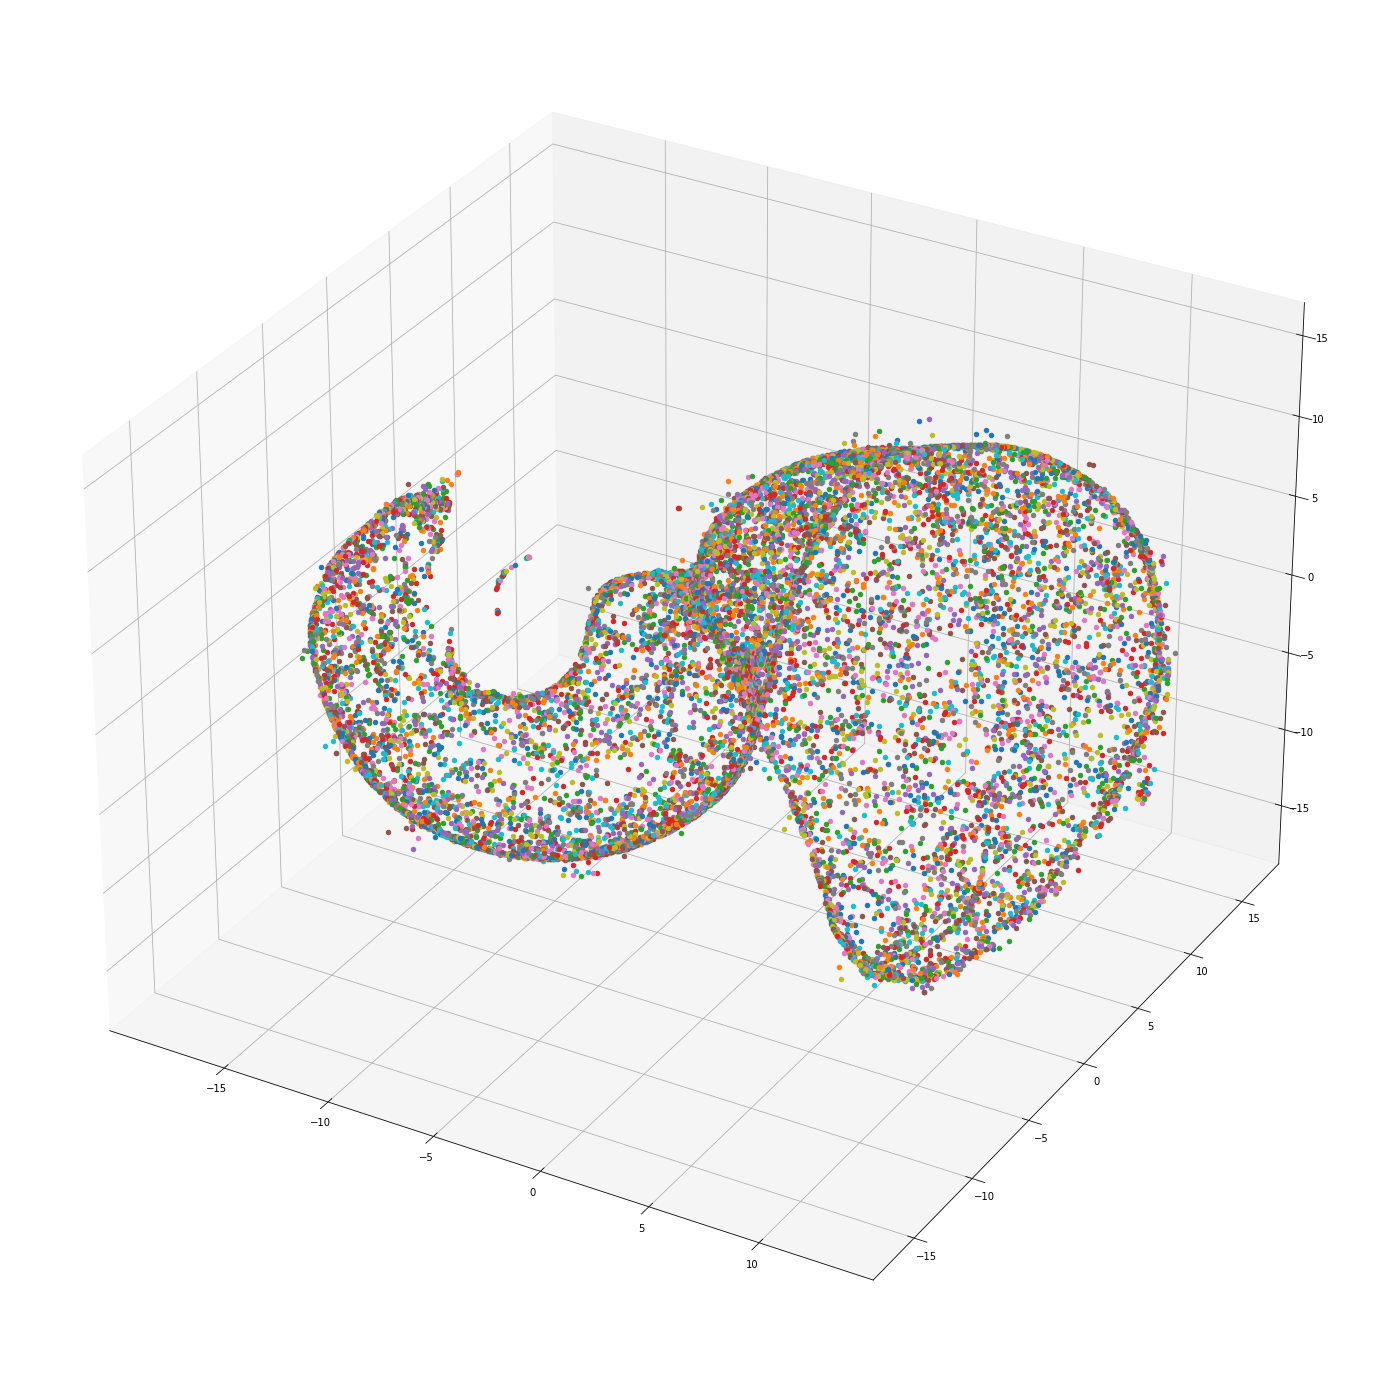

In [720]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(projection='3d')
for x, y, z in zip(x_axis, y_axis, z_axis):
    ax.scatter(x, y, z)
plt.savefig(f"../figures/TSNE25x25_3d.png", transparent=True)
plt.savefig(f"../figures/TSNE25x25_3d_bg.png")

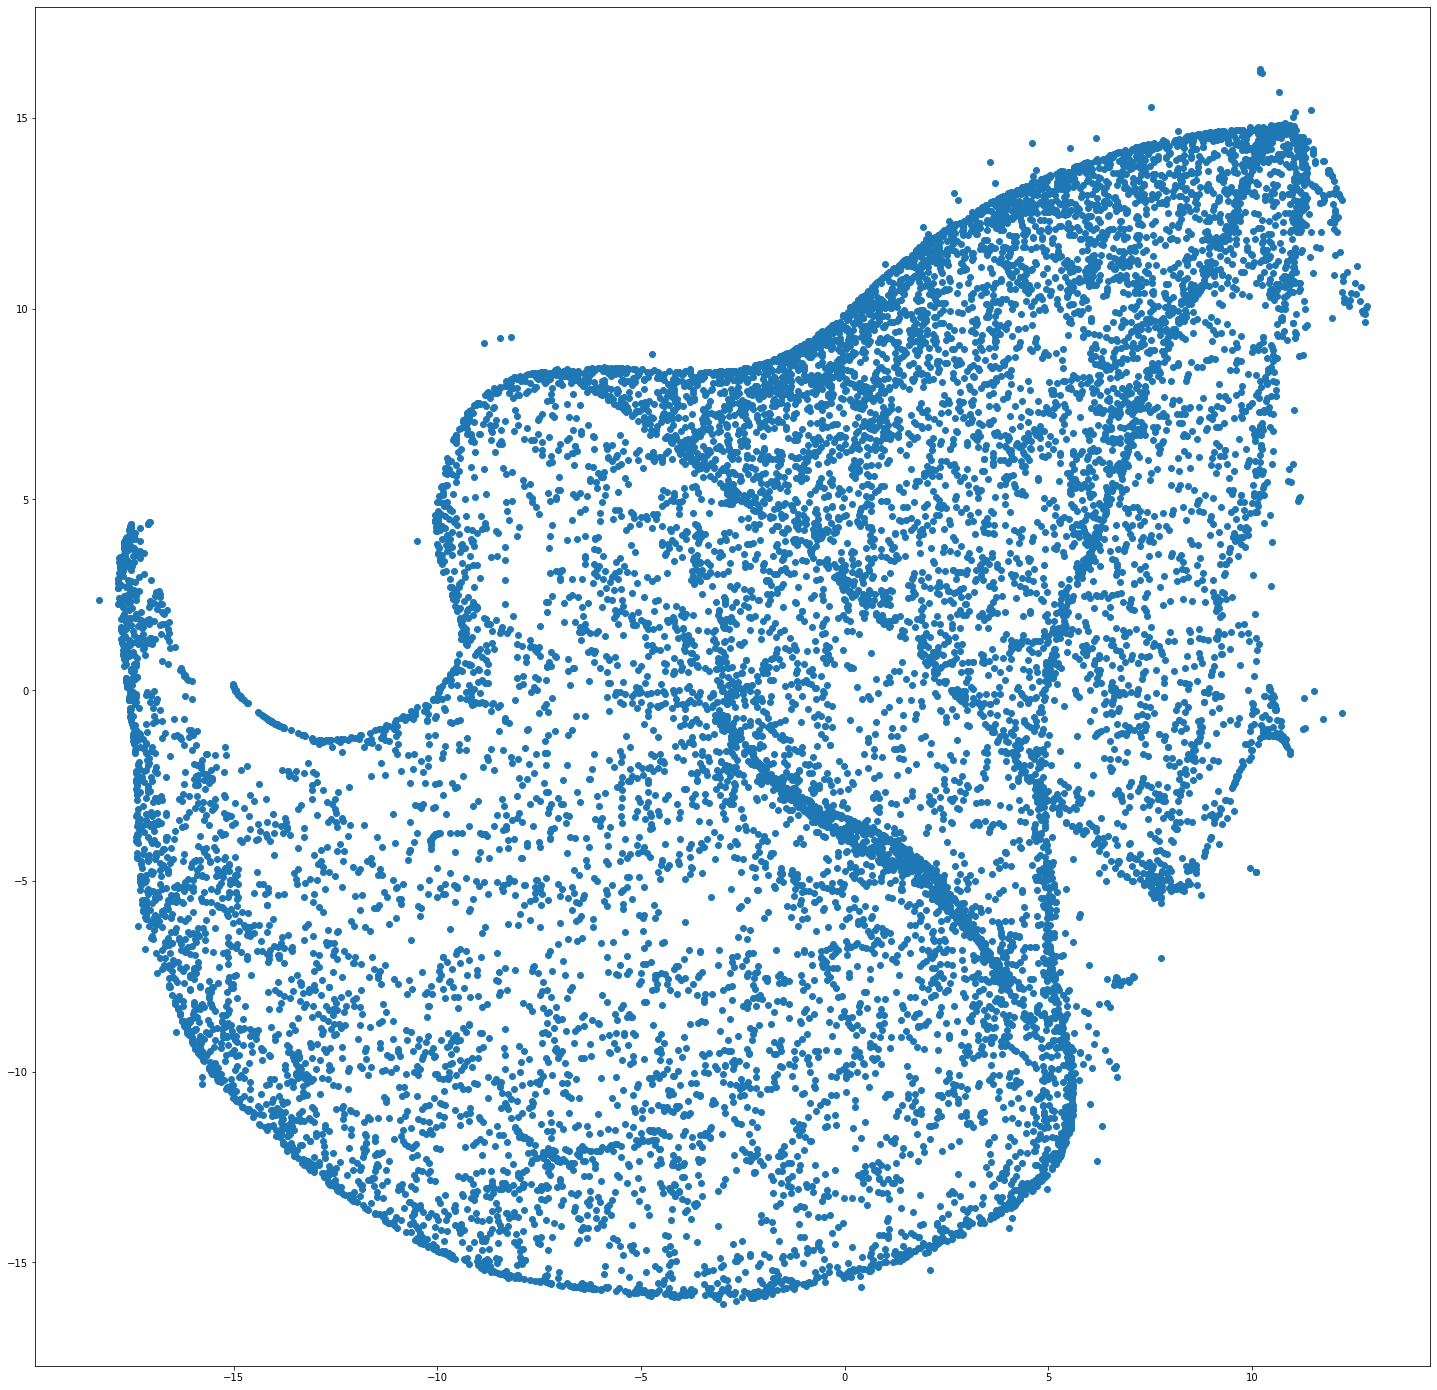

In [721]:
fig = plt.figure(figsize=(25, 25))
plt.scatter(x_axis, y_axis)

name = "../figure/TSNE25x25_x_y"
plt.savefig(f"{name}.svg", transparent=True)
plt.savefig(f"{name}.png", transparent=True)
plt.show()

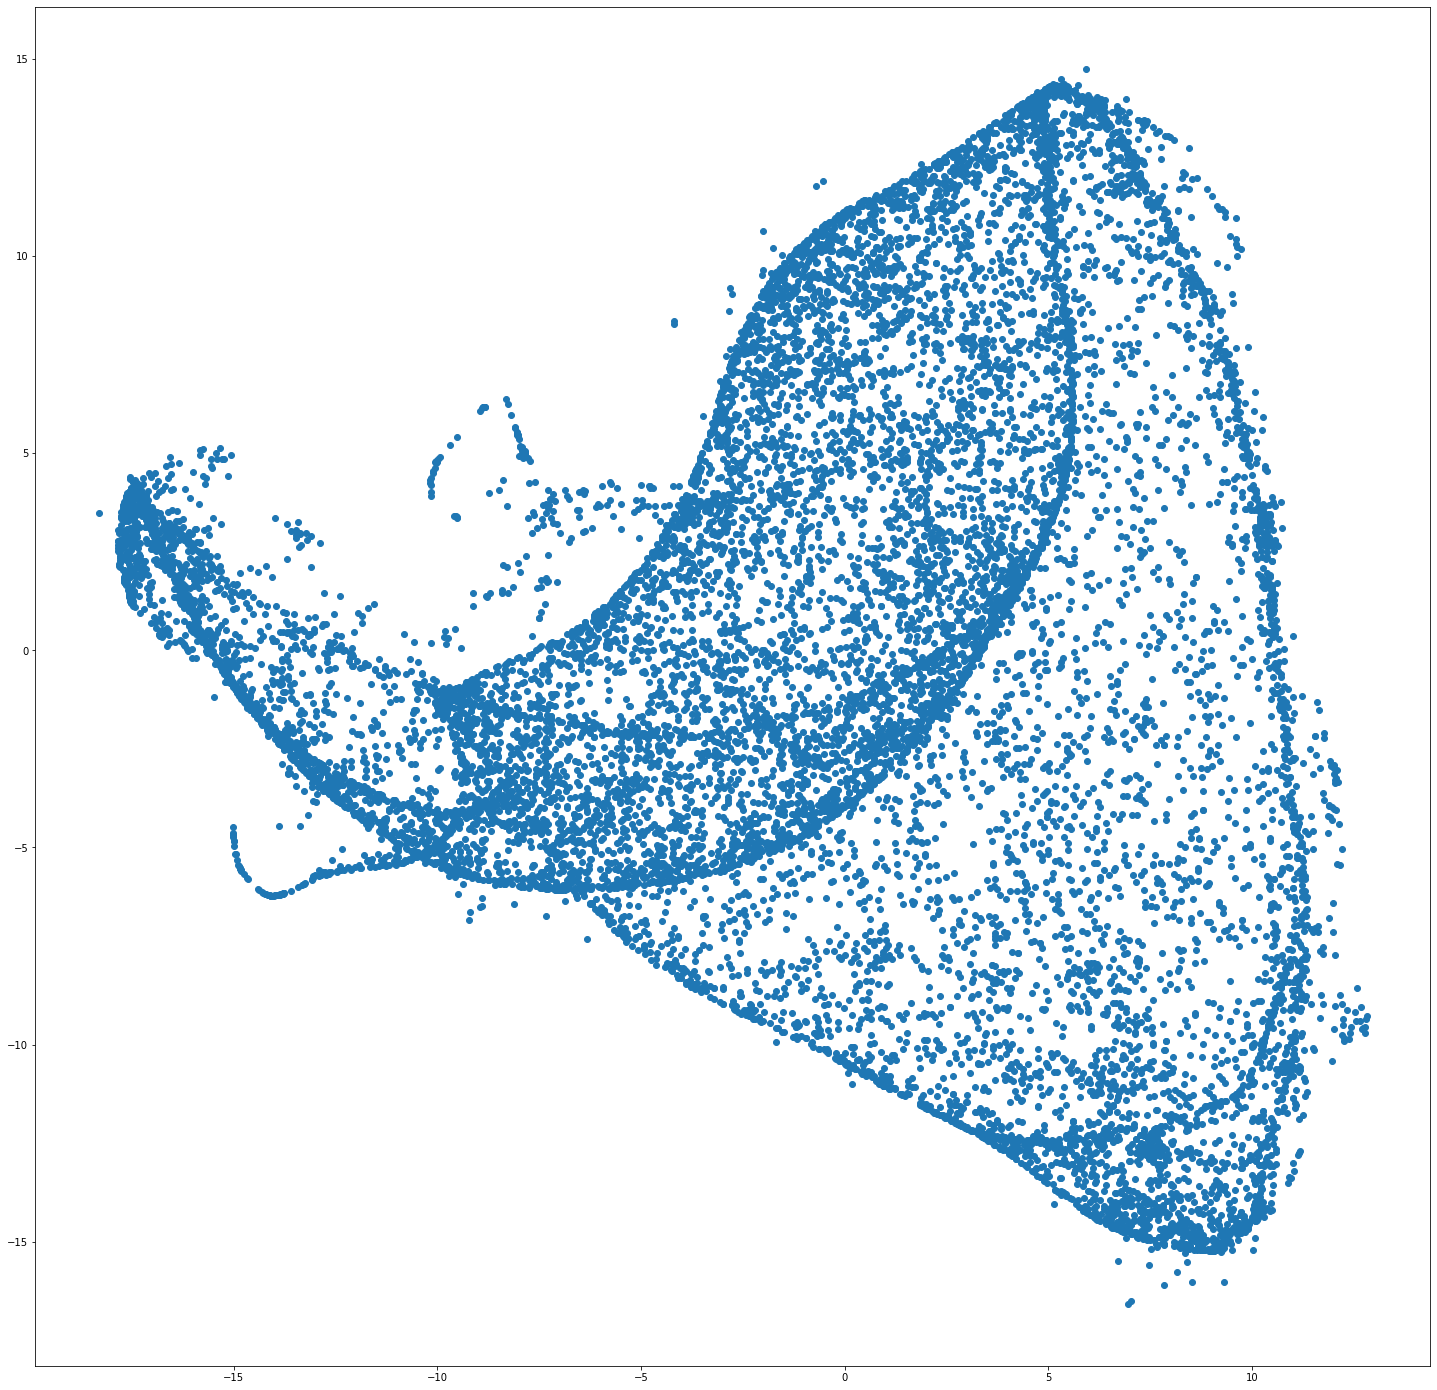

In [722]:
plt.figure(figsize=(25, 25))
plt.scatter(x_axis, z_axis)

name = "../figure/TSNE25x25_x_z"
plt.savefig(f"{name}.svg", transparent=True)
plt.savefig(f"{name}.png", transparent=True)
plt.show()

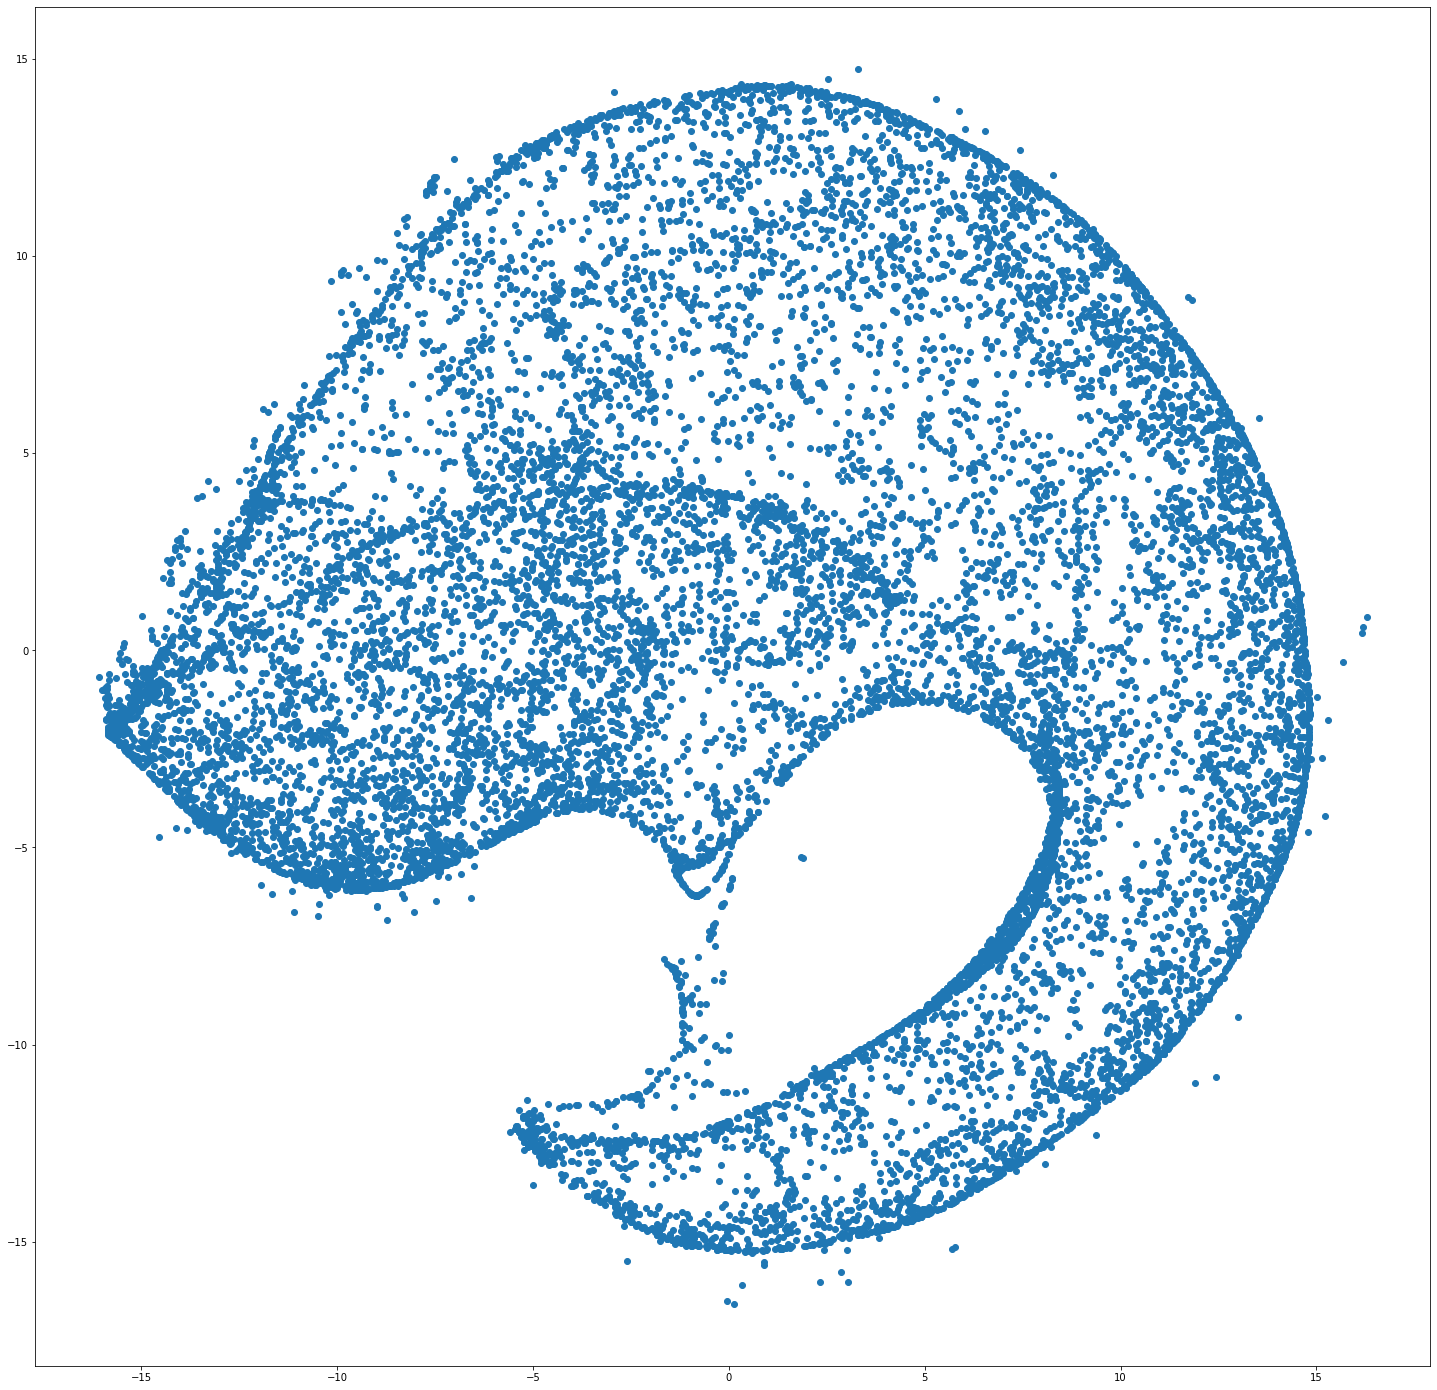

In [723]:
plt.figure(figsize=(25, 25))
plt.scatter(y_axis, z_axis)

name = "../figure/TSNE25x25_y_z"
plt.savefig(f"{name}.svg", transparent=True)
plt.savefig(f"{name}.png", transparent=True)
plt.show()

In [695]:
transformed[:10]

array([[  0.09501338,  -8.590357  ,  -3.903553  ],
       [ -9.756464  , -14.175023  ,  -1.580487  ],
       [  1.6109012 , -12.156973  ,  -1.7831846 ],
       [ -9.534714  ,   5.599314  ,  -1.1696931 ],
       [-15.852496  ,  -6.4377747 ,   3.7177572 ],
       [ -4.91766   ,   1.7807109 ,   2.0567067 ],
       [ 10.122642  ,   4.9099917 , -14.362931  ],
       [ -4.460938  ,   7.864126  ,  -1.1728948 ],
       [  4.0990243 ,  12.386276  ,  -3.1476774 ],
       [-15.873536  ,  -2.4889603 ,   0.48925188]], dtype=float32)

In [696]:
model_ = KMeans(n_clusters=4)

In [697]:
model_.fit(transformed)

KMeans(n_clusters=4)

In [ ]:
pd.Series(model_.predict(transformed)).value_counts()

In [672]:
import pickle

In [699]:
with open("../models/tsne_.bf", "+wb") as file:
    pickle.dump(model, file)

In [700]:
with open("../models/kmeans_.bf", "+wb") as file:
    pickle.dump(model_, file)

In [674]:
prediction = model_.predict(transformed)

In [675]:
data["class"] = prediction

In [676]:
data_class = data.groupby("class").mean()

In [678]:
data_q_class = data_q.groupby("popularity").min()

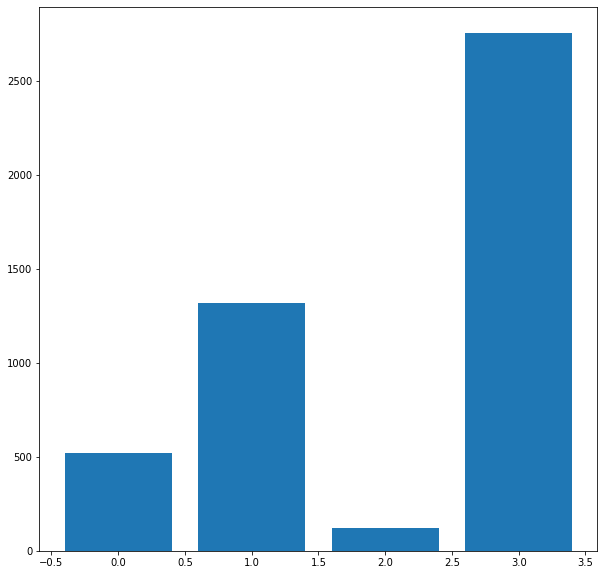

In [680]:
plt.figure(figsize=(10, 10))
plt.bar(data_class.index, height=data_class.phb_all)
plt.show()

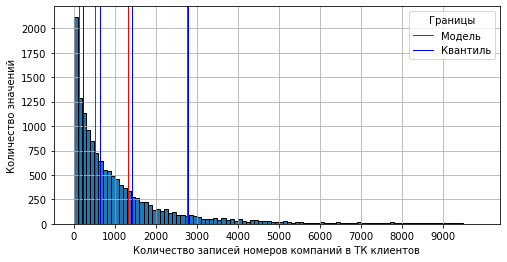

In [719]:
plt.figure(figsize=(8, 4))
data[data.phb_all > 0]["phb_all"].hist(bins=np.arange(0, 10000, 100), edgecolor = 'black')
plt.xticks(np.arange(0, 10000, 1000))
plt.xlabel("Количество записей номеров компаний в ТК клиентов")
plt.ylabel('Количество значений')

plt.axvline(data_class.phb_all[0], color='red', linewidth=1, label='Модель')
plt.axvline(data_class.phb_all[1], color='red', linewidth=1)
plt.axvline(data_class.phb_all[2], color='red', linewidth=1)
plt.axvline(data_class.phb_all[3], color='red', linewidth=1)
plt.axvline(data.phb_all.quantile(0.25), color='blue', linewidth=1, label="Квантиль")
plt.axvline(data.phb_all.quantile(0.5), color='blue', linewidth=1)
plt.axvline(data.phb_all.quantile(0.75), color='blue', linewidth=1)
plt.axvline(data.phb_all.quantile(0.9), color='blue', linewidth=1)
plt.legend(loc='upper right', title='Границы')
plt.savefig("../figures/model_and_quantiles.png", dpi=200)
plt.show()


In [683]:
data_class.phb_all[0]

520.4809510942988

In [684]:
data_class.phb_all

class
0     520.480951
1    1318.198901
2     122.476080
3    2757.835291
Name: phb_all, dtype: float64

In [701]:
from sklearn.metrics import classification_report, r2_score

In [686]:
q_model = list(sorted(data_class.phb_all))
q_quantile = data.phb_all.quantile([0.25, 0.50, 0.75, 0.9, 1])

In [687]:
q_model

[122.47608024691358, 520.4809510942988, 1318.1989014165945, 2757.835290747637]

In [688]:
q_quantile

0.25      219.5
0.50      631.0
0.75     1418.0
0.90     2783.0
1.00    10654.0
Name: phb_all, dtype: float64

In [689]:
def get_size_quantile(phb_cnt):
    for i, v in enumerate(q_quantile.values):
        if phb_cnt <= v:
            return i

In [690]:
def get_size_model(phb_cnt):
    for i, v in enumerate(q_model):
        if phb_cnt <= v:
            return i
    return 4

In [691]:
y_true = data.phb_all.apply(get_size_quantile)
y_pred = data.phb_all.apply(get_size_model)

In [692]:
y_pred[:5]

0    3
1    3
2    3
3    0
5    4
Name: phb_all, dtype: int64

In [693]:
y_true[:5]

0    3
1    3
2    3
3    0
5    4
Name: phb_all, dtype: int64

In [694]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.81      3635
           1       0.71      0.79      0.75      3636
           2       0.81      0.91      0.86      3635
           3       0.87      0.99      0.93      2181
           4       0.99      1.00      0.99      1452

    accuracy                           0.84     14539
   macro avg       0.88      0.87      0.87     14539
weighted avg       0.86      0.84      0.84     14539



In [702]:
r2_score(y_true, y_pred)

0.903878581045539